In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Heiti TC']
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv("data_clean/generation_capacity_long.csv")

# 基本資料
print(df.head())
print(df.info())

# 將 period 轉成日期格式
df['period'] = pd.to_datetime(df['period'])


       period raw_period   owner_group owner technology  capacity_mw
0  1982-01-01     71年01月  nation_total    全國         合計      10158.0
1  1982-01-01     71年01月  nation_total    全國       抽蓄水力          0.0
2  1982-01-01     71年01月  nation_total    全國         火力       6514.0
3  1982-01-01     71年01月  nation_total    全國         燃煤       1405.0
4  1982-01-01     71年01月  nation_total    全國         燃油       5109.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36750 entries, 0 to 36749
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   period       36750 non-null  object 
 1   raw_period   36750 non-null  object 
 2   owner_group  36750 non-null  object 
 3   owner        36750 non-null  object 
 4   technology   36750 non-null  object 
 5   capacity_mw  36750 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.7+ MB
None


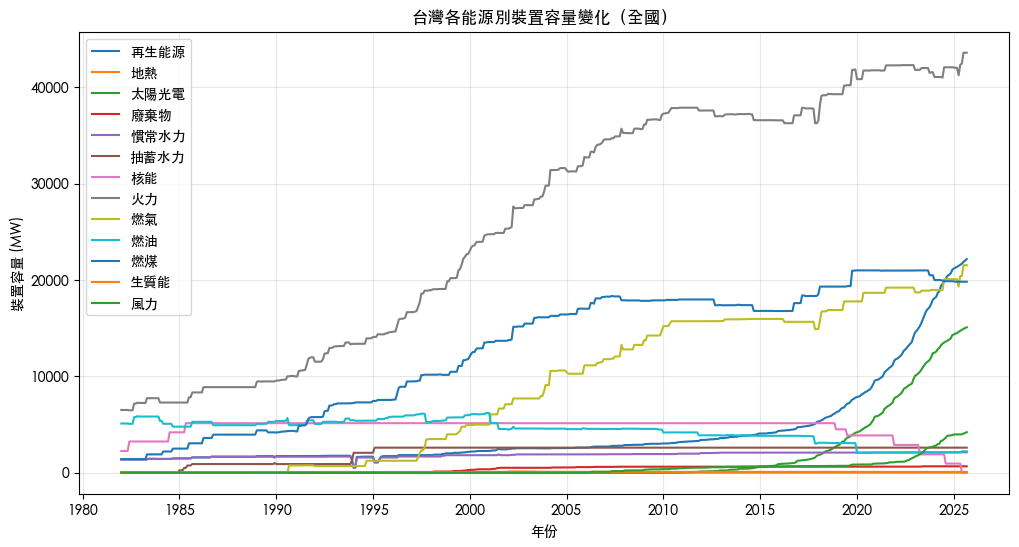

In [4]:
# 過濾全國合計
nation = df[(df["owner_group"] == "nation_total") & (df["technology"] != "合計")]

# 按年月、技術匯總
trend = nation.groupby(["period", "technology"])["capacity_mw"].sum().reset_index()

plt.figure(figsize=(12,6))
for tech in trend["technology"].unique():
    sub = trend[trend["technology"] == tech]
    plt.plot(sub["period"], sub["capacity_mw"], label=tech)

plt.title("台灣各能源別裝置容量變化（全國）")
plt.xlabel("年份")
plt.ylabel("裝置容量 (MW)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


<Figure size 1200x600 with 0 Axes>

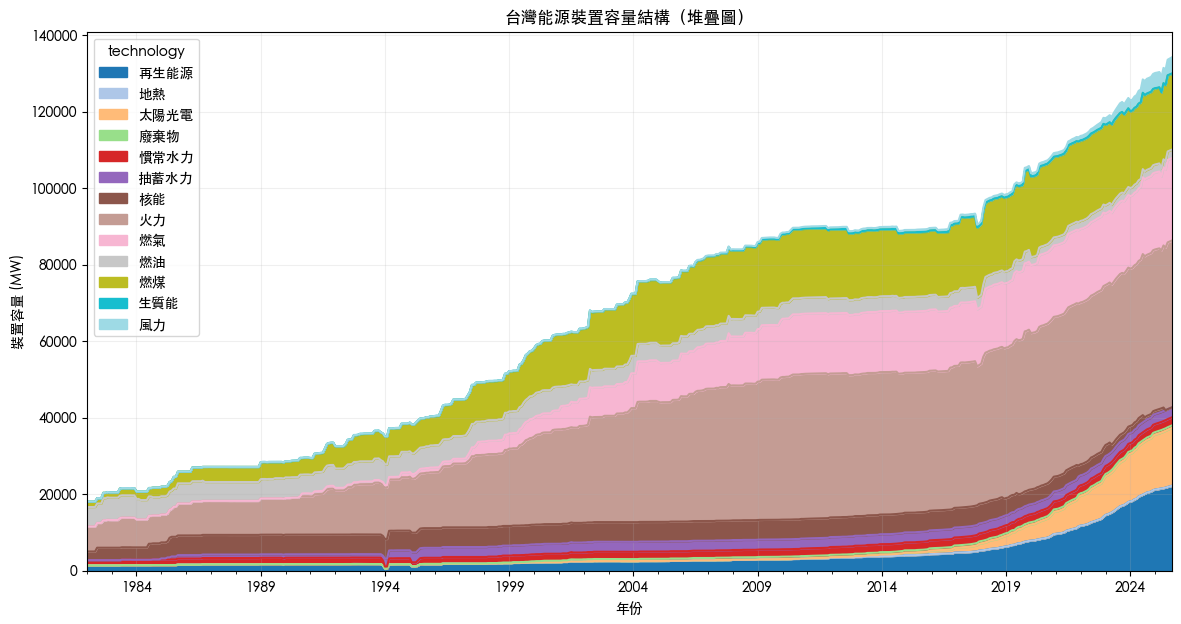

In [5]:
pivot = trend.pivot_table(index="period", columns="technology", values="capacity_mw", aggfunc="sum")

plt.figure(figsize=(12,6))
pivot.plot.area(figsize=(14,7), cmap="tab20")
plt.title("台灣能源裝置容量結構（堆疊圖）")
plt.xlabel("年份")
plt.ylabel("裝置容量 (MW)")
plt.grid(alpha=0.2)
plt.show()


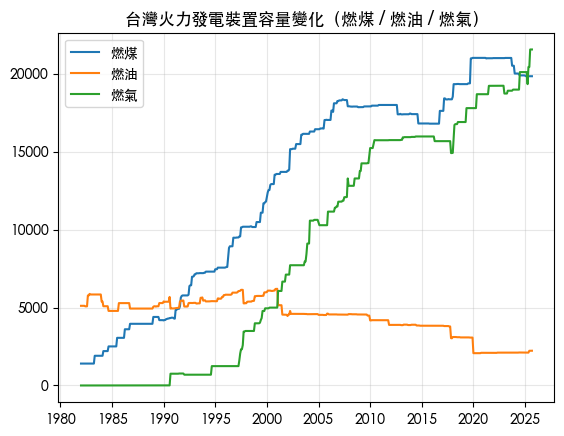

In [6]:
fire = nation[nation["technology"].isin(["燃煤", "燃油", "燃氣"])]

for tech in fire["technology"].unique():
    sub = fire[fire["technology"] == tech]
    plt.plot(sub["period"], sub["capacity_mw"], label=tech)

plt.title("台灣火力發電裝置容量變化（燃煤 / 燃油 / 燃氣）")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


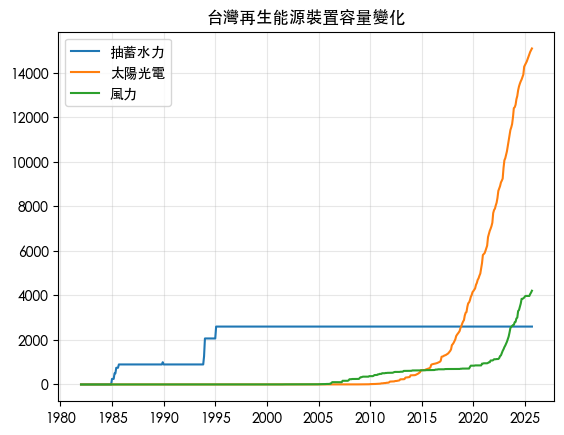

In [7]:
renewable_techs = ["太陽光電", "風力", "水力", "水力發電", "抽蓄水力"]
renew = nation[nation["technology"].isin(renewable_techs)]

for tech in renew["technology"].unique():
    sub = renew[renew["technology"] == tech]
    plt.plot(sub["period"], sub["capacity_mw"], label=tech)

plt.title("台灣再生能源裝置容量變化")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


      period raw_period   owner_group owner technology  capacity_mw
0 1982-01-01     71年01月  nation_total    全國         合計      10158.0
1 1982-01-01     71年01月  nation_total    全國       抽蓄水力          0.0
2 1982-01-01     71年01月  nation_total    全國         火力       6514.0
3 1982-01-01     71年01月  nation_total    全國         燃煤       1405.0
4 1982-01-01     71年01月  nation_total    全國         燃油       5109.0
        date  net_peak_capacity_mw  peak_load_mw  reserve_capacity_mw  \
0 2024-01-01               30758.0       25328.0               3900.0   
1 2024-01-02               32800.0       28703.0               4517.0   
2 2024-01-03               34208.0       28996.0               5601.0   
3 2024-01-04               33596.0       29337.0               5303.0   
4 2024-01-05               33930.0       28946.0               3804.0   

   reserve_margin_pct  industrial_consumption_gwh  residential_consumption_gwh  
0               15.21                     302.784                      2

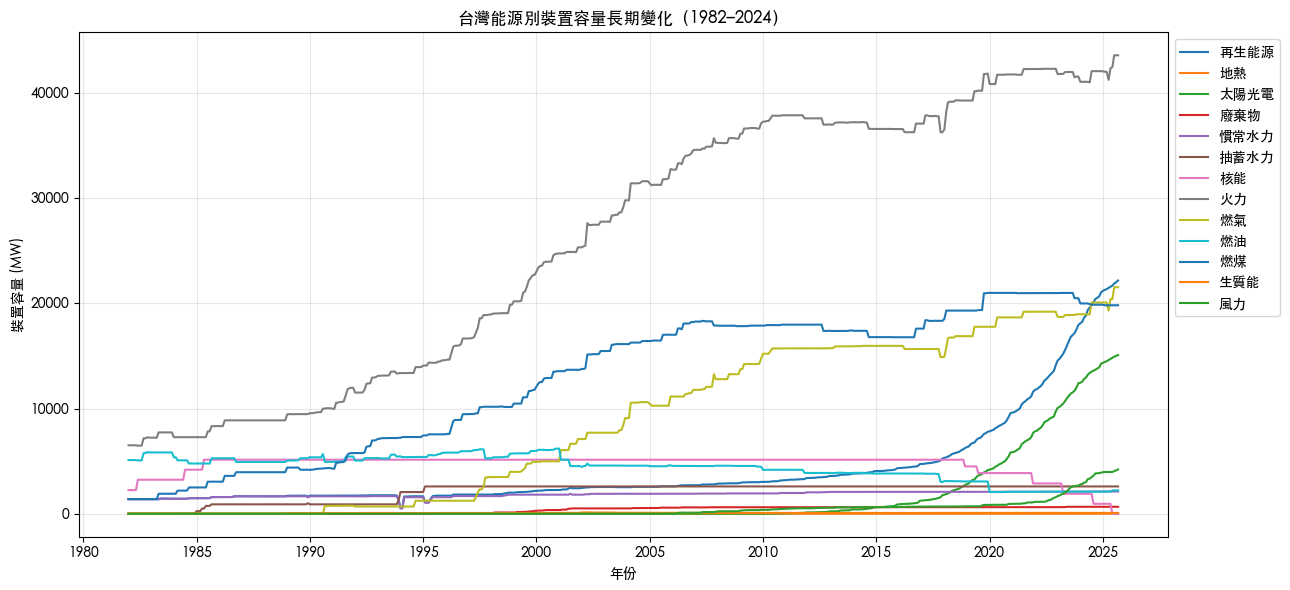

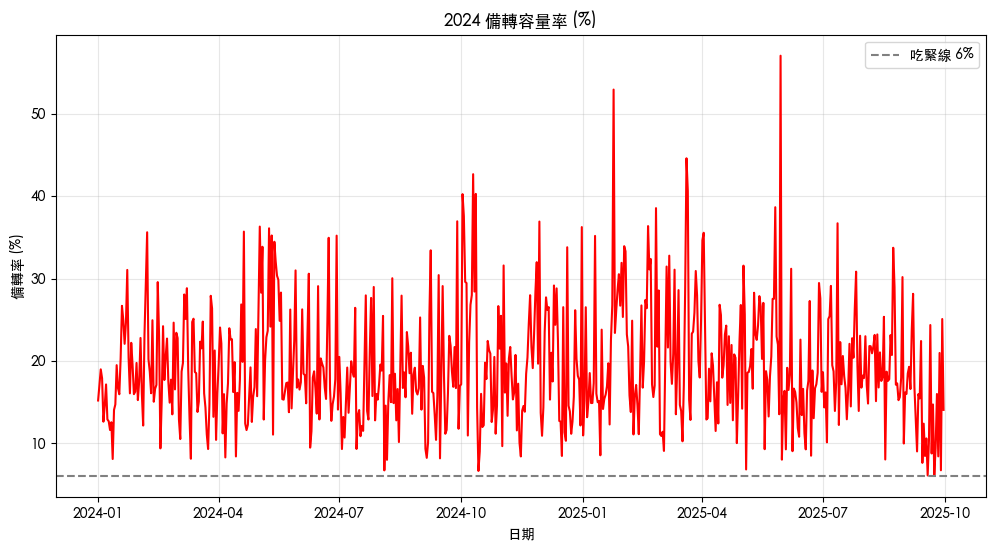

⚠ 備轉率 < 6% 的日期：
Empty DataFrame
Columns: [date, reserve_margin_pct]
Index: []


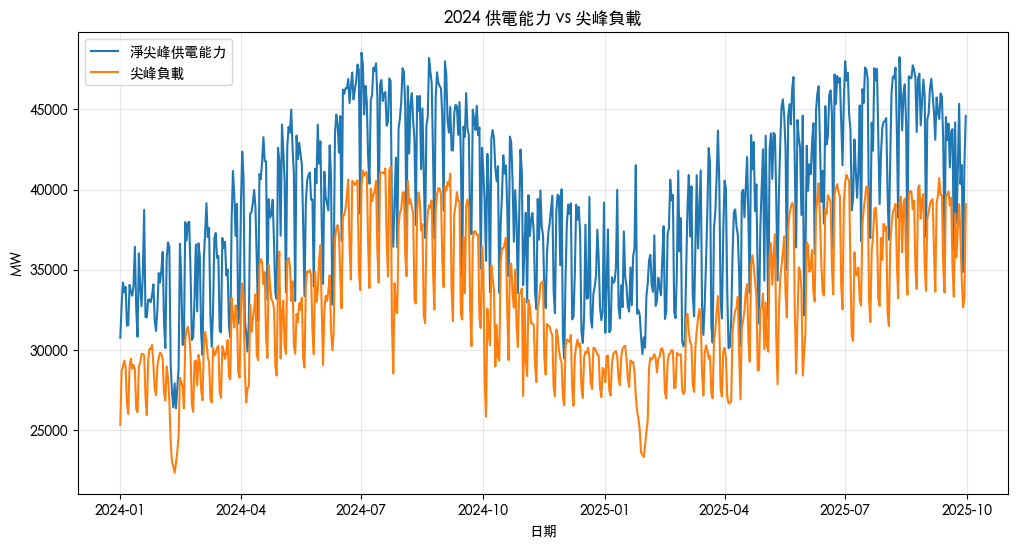

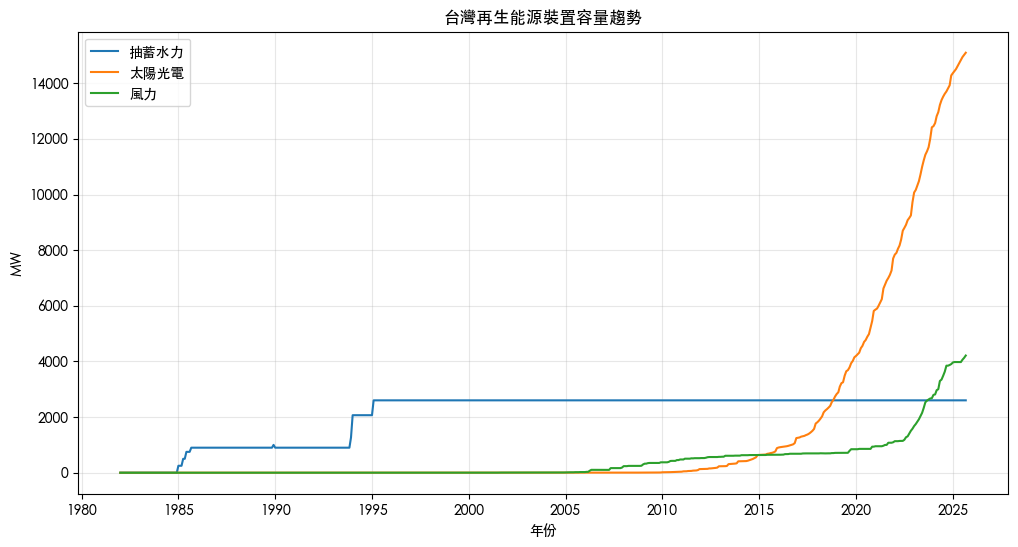

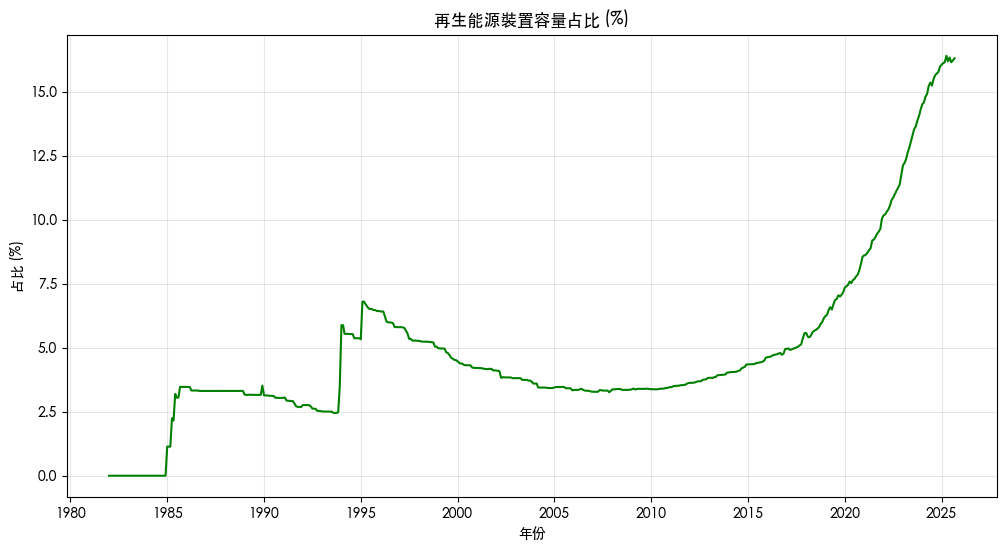

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# =========================
# 1. 讀取資料
# =========================
cap = pd.read_csv("data_clean/generation_capacity_long.csv")
supply = pd.read_csv("data_clean/power_supply_demand_summary.csv")

cap['period'] = pd.to_datetime(cap['period'])
supply['date'] = pd.to_datetime(supply['date'])

print(cap.head())
print(supply.head())


# =========================
# 2. A. 長期裝置容量分析
# =========================

# 過濾「全國」資料 + 移除合計避免重複
nation = cap[(cap["owner_group"] == "nation_total") & (cap["technology"] != "合計")]

# 按年份與技術彙整
trend = nation.groupby(["period", "technology"])["capacity_mw"].sum().reset_index()

# 折線圖：各能源別裝置容量
plt.figure(figsize=(13,6))
for tech in trend["technology"].unique():
    sub = trend[trend["technology"] == tech]
    plt.plot(sub["period"], sub["capacity_mw"], label=tech)

plt.title("台灣能源別裝置容量長期變化（1982–2024）")
plt.xlabel("年份")
plt.ylabel("裝置容量 (MW)")
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# =========================
# 3. B. 2024 每日備轉率分析
# =========================

plt.figure(figsize=(12,6))
plt.plot(supply['date'], supply['reserve_margin_pct'], color='red')
plt.axhline(6, color='gray', linestyle='--', label='吃緊線 6%')

plt.title("2024 備轉容量率 (%)")
plt.xlabel("日期")
plt.ylabel("備轉率 (%)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 找出 < 6% 的天
tight_days = supply[supply['reserve_margin_pct'] < 6]
print("⚠ 備轉率 < 6% 的日期：")
print(tight_days[['date', 'reserve_margin_pct']])


# =========================
# 4. C. 裝置容量 vs 尖峰負載
# =========================

plt.figure(figsize=(12,6))
plt.plot(supply['date'], supply['net_peak_capacity_mw'], label='淨尖峰供電能力')
plt.plot(supply['date'], supply['peak_load_mw'], label='尖峰負載')

plt.title("2024 供電能力 vs 尖峰負載")
plt.xlabel("日期")
plt.ylabel("MW")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# =========================
# 5. D. 再生能源裝置容量（太陽能/風力/水力）
# =========================

renewable_list = ["太陽光電", "風力", "水力", "抽蓄水力"]

renew = nation[nation["technology"].isin(renewable_list)]

plt.figure(figsize=(12,6))
for tech in renew["technology"].unique():
    sub = renew[renew["technology"] == tech]
    plt.plot(sub["period"], sub["capacity_mw"], label=tech)

plt.title("台灣再生能源裝置容量趨勢")
plt.xlabel("年份")
plt.ylabel("MW")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


# =========================
# 6. E. 再生能源占比（裝置容量）
# =========================

# 每年總容量
total_cap = nation.groupby("period")["capacity_mw"].sum()

# 再生能源總容量
renew_cap = renew.groupby("period")["capacity_mw"].sum()

share = (renew_cap / total_cap * 100).dropna()

plt.figure(figsize=(12,6))
plt.plot(share.index, share.values, color='green')
plt.title("再生能源裝置容量占比 (%)")
plt.xlabel("年份")
plt.ylabel("占比 (%)")
plt.grid(alpha=0.3)
plt.show()


In [20]:
# ============================
#  🔧 Matplotlib 中文字體完整修正設定（for matplotlib 3.8+）
# ============================

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# ---- 1. 刪除 Matplotlib 字體快取（必要！） ----
cache_dir = os.path.expanduser("~/.matplotlib")
if os.path.exists(cache_dir):
    for f in os.listdir(cache_dir):
        if f.startswith("fontlist") and f.endswith(".json"):
            print(f"🧹 移除字體快取：{f}")
            os.remove(os.path.join(cache_dir, f))

# ---- 2. 搜尋系統可用中文字體 ----
available_fonts = fm.findSystemFonts()
cjk_candidates = [
    "Heiti TC",
    "PingFang TC",
    "STHeiti",
    "PingFang HK",
    "Arial Unicode MS",
    "Noto Sans CJK TC"
]

chosen_font = None
for font in cjk_candidates:
    if any(font in path for path in available_fonts):
        chosen_font = font
        break

if chosen_font is None:
    raise Exception("⚠ 找不到可用中文字體，請安裝 Noto Sans CJK TC。")

print(f"👉  Matplotlib 使用中文字體：{chosen_font}")

# ---- 3. 強制套用字體設定 ----
mpl.rcParams["font.family"] = chosen_font
mpl.rcParams["font.sans-serif"] = [chosen_font]
mpl.rcParams['axes.unicode_minus'] = False

# ---- 4. 重新加載字體列表（官方支援方式） ----
fm.fontManager.addfont   # 確保 fontManager 初始化
fm._load_fontmanager()   # 重新讀取系統字體（官方方法）

print("✅ Matplotlib 中文字體設定完成（無錯誤）！")


👉  Matplotlib 使用中文字體：STHeiti
✅ Matplotlib 中文字體設定完成（無錯誤）！


In [25]:
import matplotlib.font_manager as fm

families = sorted({f.name for f in fm.fontManager.ttflist})
for name in families:
    print(name)


.Aqua Kana
.Keyboard
.New York
.SF Arabic
.SF Arabic Rounded
.SF Armenian
.SF Armenian Rounded
.SF Camera
.SF Compact
.SF Compact Rounded
.SF Georgian
.SF Georgian Rounded
.SF Hebrew
.SF Hebrew Rounded
.SF NS Mono
.SF NS Rounded
.SF Soft Numeric
.ThonburiUI
Academy Engraved LET
Al Bayan
Al Nile
Al Tarikh
American Typewriter
Andale Mono
Apple Braille
Apple Chancery
Apple SD Gothic Neo
Apple Symbols
AppleGothic
AppleMyungjo
Arial
Arial Black
Arial Hebrew
Arial Narrow
Arial Rounded MT Bold
Arial Unicode MS
Athelas
Avenir
Avenir Next
Avenir Next Condensed
Ayuthaya
Baghdad
Bangla MN
Bangla Sangam MN
Baskerville
Beirut
Big Caslon
Bodoni 72
Bodoni 72 Oldstyle
Bodoni 72 Smallcaps
Bodoni Ornaments
Bradley Hand
Brush Script MT
Chalkboard
Chalkboard SE
Chalkduster
Charter
Cochin
Comic Sans MS
Copperplate
Corsiva Hebrew
Courier
Courier New
DIN Alternate
DIN Condensed
Damascus
DecoType Naskh
DejaVu Sans
DejaVu Sans Display
DejaVu Sans Mono
DejaVu Serif
DejaVu Serif Display
Devanagari MT
Devanagari 

In [26]:
# ============================
#  Matplotlib 中文字體永久修正（macOS + Python 3.12 + Matplotlib 3.8+）
# ============================

import matplotlib as mpl
import matplotlib.font_manager as fm

# 你的系統可用中文家族（從清單挑選）
preferred_cjk_fonts = [
    "Heiti TC",
    "PingFang HK",
    "Songti SC",
    "Arial Unicode MS"
]

# 列出 Matplotlib 真的能讀取的字體名稱
system_fonts = {f.name for f in fm.fontManager.ttflist}

# 挑出第一個存在的中文字體
chosen = None
for f in preferred_cjk_fonts:
    if f in system_fonts:
        chosen = f
        break

if chosen is None:
    raise Exception("⚠ 找不到可用中文字體，建議安裝 Noto Sans CJK TC")

print("👉 Matplotlib 使用中文字體：", chosen)

# 套用字體到 Matplotlib
mpl.rcParams["font.family"] = chosen
mpl.rcParams["font.sans-serif"] = [chosen]
mpl.rcParams["axes.unicode_minus"] = False

print("✅ 中文字體設定完成，不會再 fallback 到 Arial！")


👉 Matplotlib 使用中文字體： Heiti TC
✅ 中文字體設定完成，不會再 fallback 到 Arial！


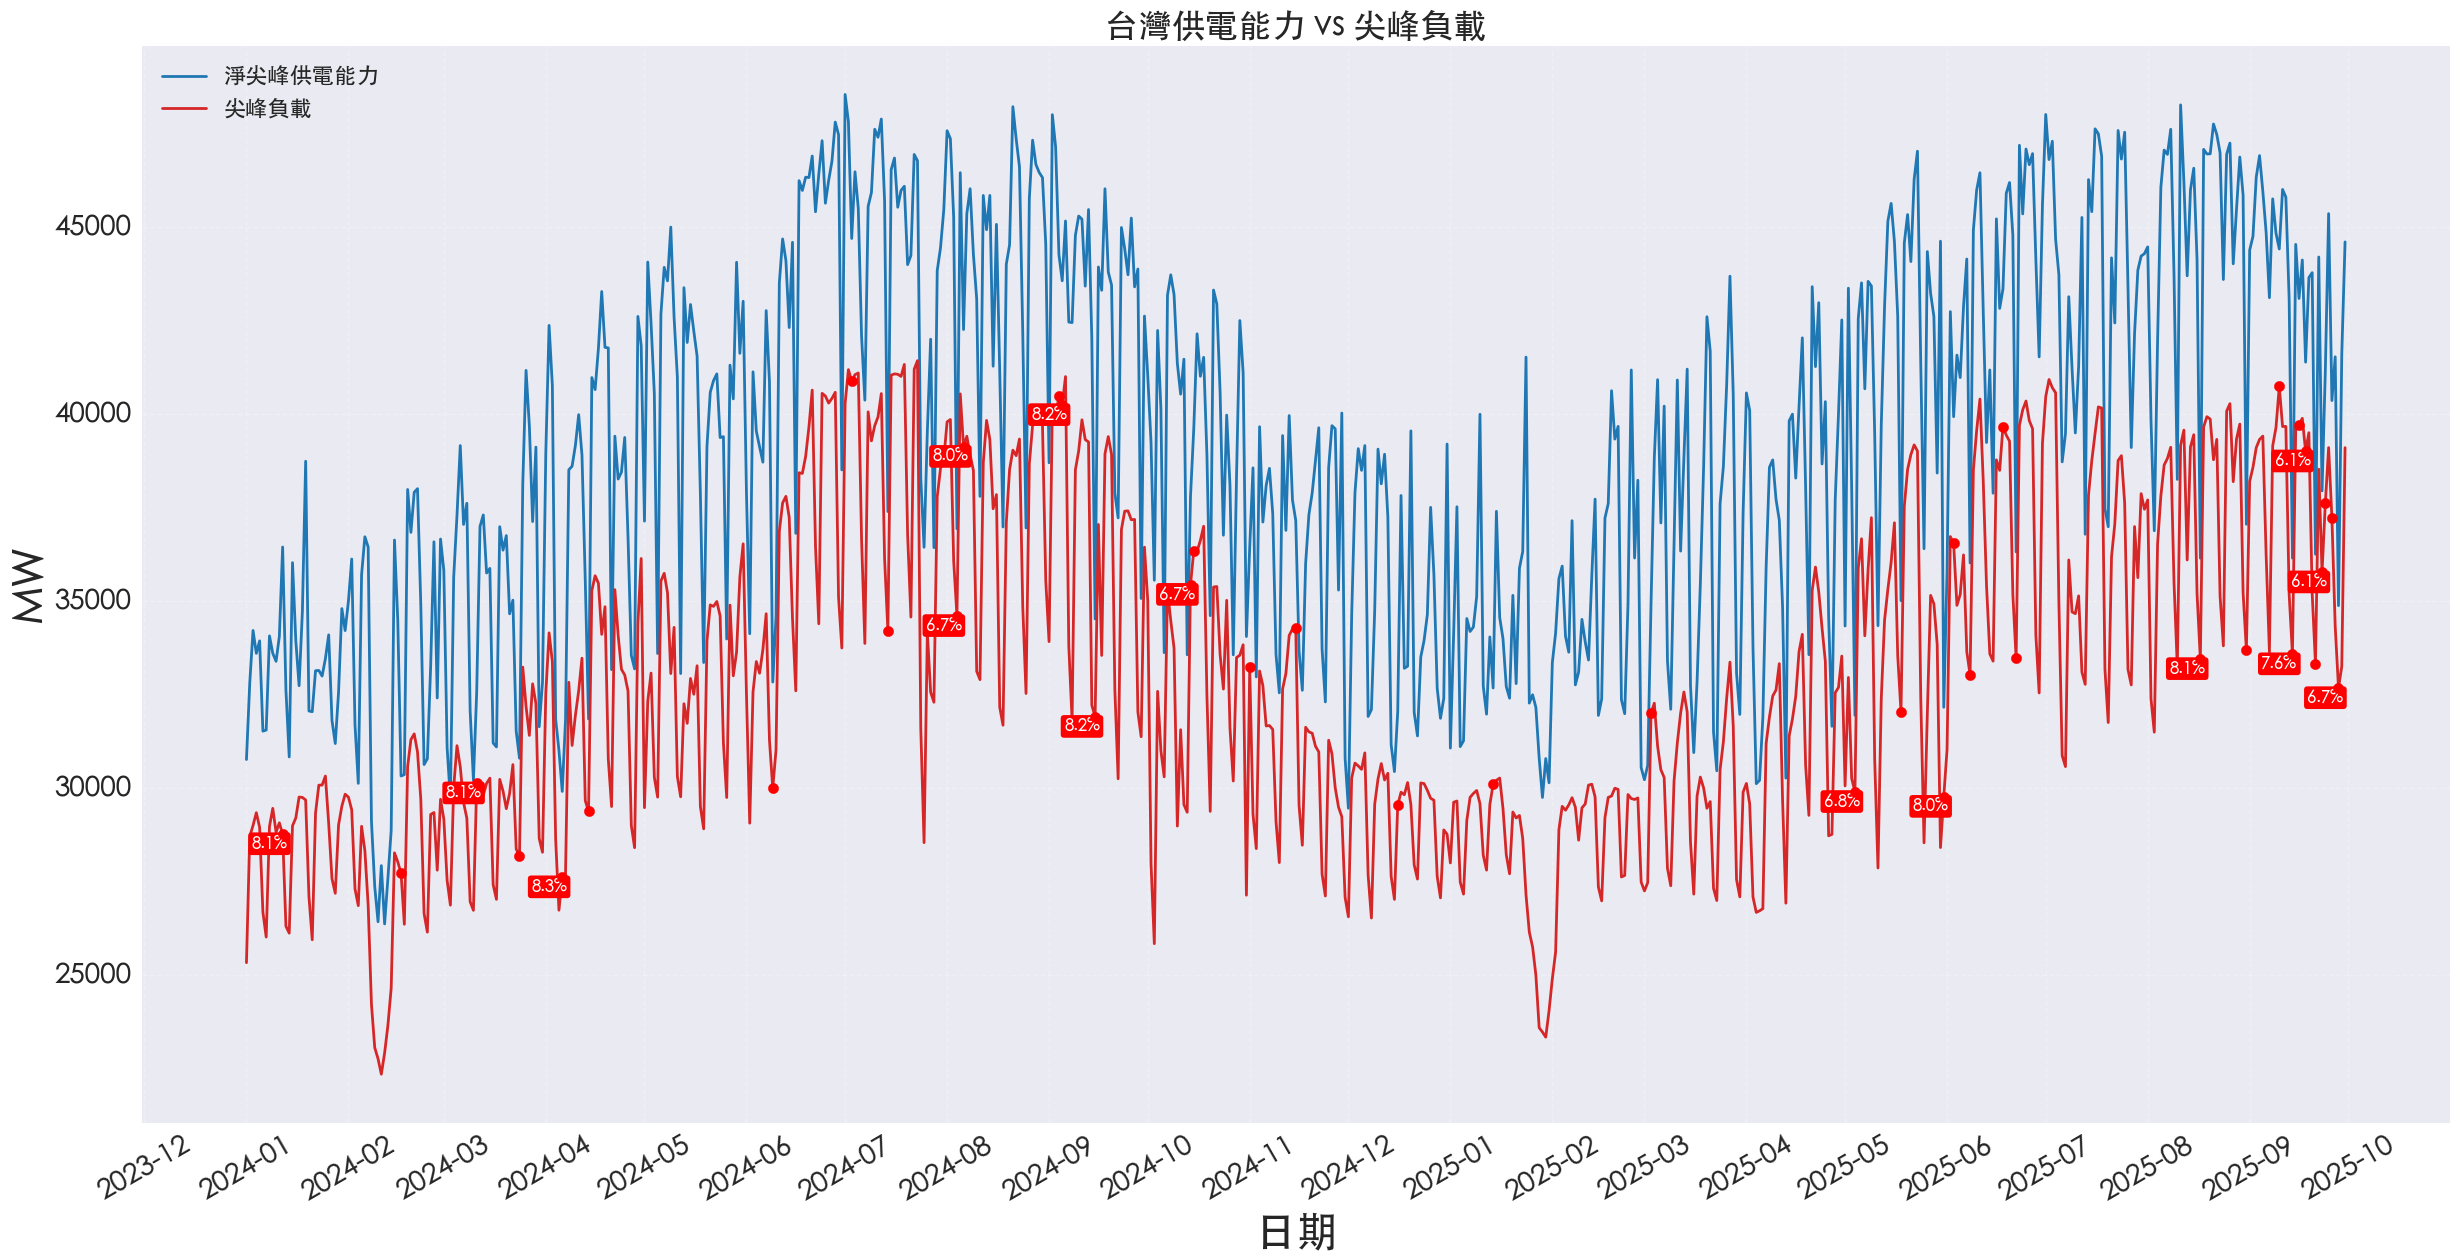

In [42]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from adjustText import adjust_text
import numpy as np

# ---------- 全局字體設定（讓整張圖變大變清楚） ----------
plt.rcParams['font.size'] = 20
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 16

plt.figure(figsize=(25, 13))

# ---------- 主圖 ----------
plt.plot(
    supply['date'],
    supply['net_peak_capacity_mw'],
    color='#1f77b4',
    linewidth=2,
    label='淨尖峰供電能力'
)

plt.plot(
    supply['date'],
    supply['peak_load_mw'],
    color='#d62728',
    linewidth=2,
    label='尖峰負載'
)

# ---------- 危急天（<10%） ----------
tight = supply[supply['reserve_margin_pct'] < 10]

plt.scatter(
    tight['date'],
    tight['peak_load_mw'],
    color='red',
    s=55,            # 點也稍微變大
    zorder=5,
)

# ---------- 標記最低 15 天 ----------
lowest = tight.nsmallest(15, 'reserve_margin_pct')

texts = []
for _, row in lowest.iterrows():
    texts.append(
        plt.text(
            row['date'],
            row['peak_load_mw'],
            f"{row['reserve_margin_pct']:.1f}%",
            color='white',
            fontsize=12,     # 將標籤字體變大
            ha='center',
            va='center',
            bbox=dict(boxstyle='round,pad=0.2',
                      facecolor='red',
                      edgecolor='none')
        )
    )

# ---------- 自動避免標籤重疊 ----------
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

# ---------- X 軸改善 ----------
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.xticks(rotation=30)

# ---------- 格線 & 樣式 ----------
plt.grid(alpha=0.25, linestyle='--')
plt.title("台灣供電能力 vs 尖峰負載", fontsize=24)
plt.xlabel("日期")
plt.ylabel("MW")
plt.legend()

plt.tight_layout()
plt.show()

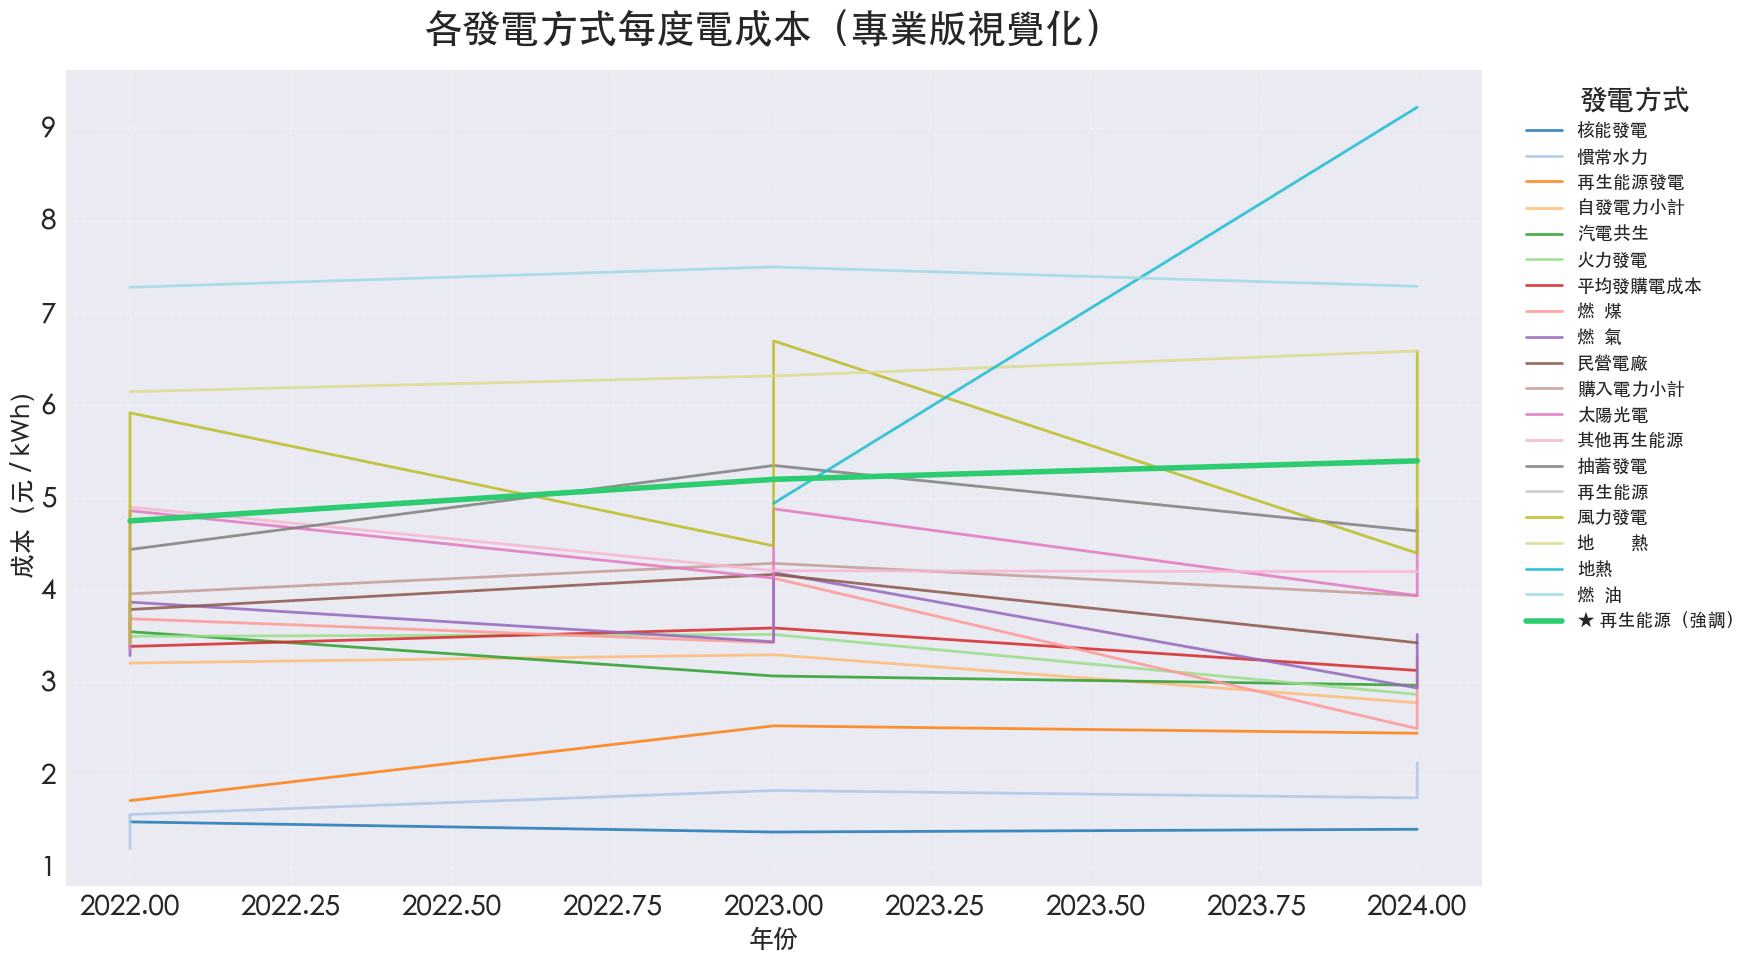

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 中文字體（你本機可以正常運作）
plt.rcParams['font.family'] = 'Heiti TC'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv("data_clean/generation_costs_by_technology.csv")

plt.figure(figsize=(18, 10))

# 依平均成本排序 → 圖例更乾淨
tech_order = df.groupby("item")["cost_ntd_per_kwh"].mean().sort_values().index
colors = plt.cm.tab20(np.linspace(0, 1, len(tech_order)))

# 一般項目
for color, tech in zip(colors, tech_order):
    sub = df[df["item"] == tech].sort_values("calendar_year")
    plt.plot(
        sub["calendar_year"],
        sub["cost_ntd_per_kwh"],
        label=tech,
        linewidth=2,
        alpha=0.85,
        color=color
    )

# 重大項目加粗
highlight = {
    "再生能源": "#2ecc71",
    "燃氣": "#f1c40f",
    "燃煤": "#e74c3c",
}

for name, col in highlight.items():
    if name in tech_order:
        sub = df[df["item"] == name].sort_values("calendar_year")
        plt.plot(
            sub["calendar_year"],
            sub["cost_ntd_per_kwh"],
            linewidth=4,
            color=col,
            label=f"★ {name}（強調）",
            zorder=5
        )

# 標題、格線、美化
plt.title("各發電方式每度電成本（專業版視覺化）", fontsize=28, pad=20)
plt.xlabel("年份", fontsize=18)
plt.ylabel("成本（元 / kWh）", fontsize=18)
plt.grid(alpha=0.25, linestyle='--')

# 圖例放右邊，乾淨不擠
plt.legend(
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    fontsize=13,
    title="發電方式"
)

plt.tight_layout()
plt.show()
